## 🟢 Step 1: Load Dataset
#### Kita pakai dataset California Housing dari sklearn.datasets. Dataset ini berisi harga rumah di California. Targetnya adalah harga rumah median dalam satu blok (dalam satuan 100.000 USD).

In [1]:
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
target = data.target  # Ambil target (harga rumah)

# Cek beberapa nilai pertama
print(target[:10])

[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


## 🟢 Step 2: Cek Distribusi Awal

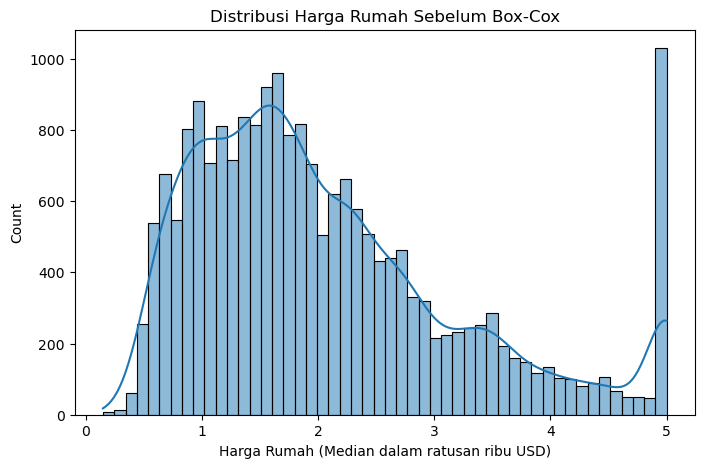

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi harga rumah
plt.figure(figsize=(8, 5))
sns.histplot(target, kde=True, bins=50)
plt.title("Distribusi Harga Rumah Sebelum Box-Cox")
plt.xlabel("Harga Rumah (Median dalam ratusan ribu USD)")
plt.show()


## 🟢 Step 3: Terapkan Box-Cox Transformation

In [3]:
print(f"Nilai minimum dari target: {target.min()}")

# Mantap, nilai minimumnya 0.14999 alias masih positif, jadi kita bisa langsung pakai Box-Cox tanpa perlu modifikasi data!

Nilai minimum dari target: 0.14999


## 🟢 Step 4: Transformasi Box-Cox
#### Kita gunakan fungsi boxcox() dari scipy.stats, yang akan:
#### ✅ Mengubah distribusi data supaya lebih normal
#### ✅ Menghasilkan λ (lambda) optimal untuk transformasi terbaik

In [4]:
from scipy.stats import boxcox

# Terapkan Box-Cox
target_transformed, best_lambda = boxcox(target)

# Tampilkan nilai lambda terbaik
print(f"Lambda terbaik untuk transformasi: {best_lambda:.4f}")


Lambda terbaik untuk transformasi: 0.1247


## 🟢 Step 5: Bandingkan Distribusi

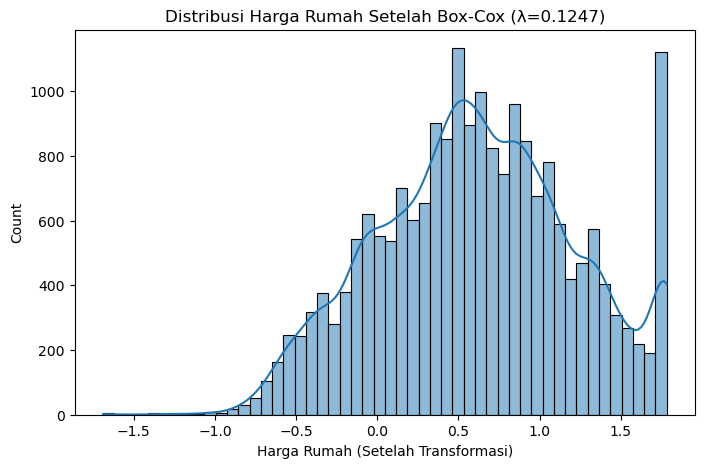

In [5]:
# Plot distribusi setelah Box-Cox
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(target_transformed, kde=True, bins=50)
plt.title(f"Distribusi Harga Rumah Setelah Box-Cox (λ={best_lambda:.4f})")
plt.xlabel("Harga Rumah (Setelah Transformasi)")
plt.show()


### Kesimpulan
### Box-Cox berguna untuk menormalkan distribusi data agar lebih cocok untuk model yang asumsi normalitasnya kuat (misal, regresi linear).

### Nilai lambda (λ) = 0.1247 menunjukkan transformasi optimal yang mengurangi skewness.

### Jika data punya nilai 0 atau negatif, harus ditambah konstanta sebelum Box-Cox bisa diterapkan.\

## 🚀 Workflow Setelah Box-Cox
#### Pisah Data Jadi Train & Test

#### Preprocessing Fitur & Target

#### Latih Model Regresi

#### Evaluasi Model

In [6]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = data.data  # Semua fitur
y = target_transformed  # Target setelah Box-Cox

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)


LinearRegression()

In [9]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

print("📊 Evaluasi Linear Regression:")
evaluate_model(model_lr, X_test_scaled, y_test)

print("\n🌲 Evaluasi Random Forest:")
evaluate_model(model_rf, X_test_scaled, y_test)


📊 Evaluasi Linear Regression:
MSE: 0.1491
MAE: 0.2883
R² Score: 0.5982

🌲 Evaluasi Random Forest:
MSE: 0.0641
MAE: 0.1728
R² Score: 0.8271


## Note: 
#### Box-Cox hanya untuk target (y), karena tujuannya adalah membuat distribusi target lebih normal agar model bisa bekerja lebih baik.